**This project implements a Forex agentic AI that automatically downloads historical forex data from Yahoo Finance, trains time-series forecasting models using Prophet, predicts average exchange rates for 2026, classifies each currency pair as likely to increase or decrease, and visualizes both individual and combined forecasts.**

In [1]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
class ForexAgent:
    def __init__(self, pairs):
        self.pairs = pairs
        self.data = {}
        self.models = {}

    # Step 1: Fetch historical data
    def fetch_data(self, start='2015-01-01', end='2025-12-31'):
        for pair in self.pairs:
            df = yf.download(pair, start=start, end=end)

            if df.empty:
                print(f"Warning: {pair} returned no data, skipping.")
                continue

            df = df.reset_index()
            col = 'Close' if 'Close' in df.columns else 'Adj Close' if 'Adj Close' in df.columns else None
            if col is None:
                print(f"Warning: {pair} has no Close/Adj Close data, skipping.")
                continue

            df[col] = pd.to_numeric(df[col].squeeze(), errors='coerce')
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[['Date', col]].dropna()
            df = df.rename(columns={col: 'Close'})

            if df.empty:
                print(f"Warning: {pair} has no usable data after cleaning, skipping.")
                continue

            self.data[pair] = df

        if not self.data:
            raise ValueError("No currency pair has valid data.")
        print("Forex data fetched!")

    # Step 2: Train Prophet models
    def train_models(self):
        for pair, df in self.data.items():
            y_series = pd.to_numeric(df['Close'].squeeze(), errors='coerce')
            if y_series.empty or y_series.ndim != 1:
                print(f"Skipping {pair}: invalid data for Prophet.")
                continue
            df_prophet = pd.DataFrame({'ds': df['Date'], 'y': y_series})
            model = Prophet(daily_seasonality=False, yearly_seasonality=True)
            model.fit(df_prophet)
            self.models[pair] = model
        print("Models trained!")

    # Step 3: Predict 2026 rates
    def predict_2026(self):
        results = []
        for pair, model in self.models.items():
            future = model.make_future_dataframe(periods=365)
            forecast = model.predict(future)
            forecast_2026 = forecast[forecast['ds'] >= pd.Timestamp('2026-01-01')]
            if forecast_2026.empty: continue
            predicted_rate = float(forecast_2026['yhat'].mean())
            current_rate = float(self.data[pair]['Close'].iloc[-1])
            signal = 'Increase' if predicted_rate > current_rate else 'Decrease'
            results.append({
                'Pair': pair,
                'Current Rate': current_rate,
                'Predicted Rate 2026': predicted_rate,
                'Signal': signal
            })
        return pd.DataFrame(results)

    # Plot forecast for a specific pair
    def plot_forecast(self, pair):
        if pair not in self.models:
            print(f"No model for {pair}")
            return
        future = self.models[pair].make_future_dataframe(periods=365)
        forecast = self.models[pair].predict(future)
        plt.figure(figsize=(10,5))
        plt.plot(self.data[pair]['Date'], self.data[pair]['Close'], label='Actual')
        plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
        plt.title(f"{pair} Forecast for 2026")
        plt.legend()
        plt.show()

    # Plot all forecasts together
    def plot_all_forecasts(self):
        plt.figure(figsize=(15,7))
        for pair, model in self.models.items():
            future = model.make_future_dataframe(periods=365)
            forecast = model.predict(future)
            plt.plot(forecast['ds'], forecast['yhat'], label=pair)
        plt.title("Forecasts for All Currency Pairs for 2026")
        plt.xlabel("Date")
        plt.ylabel("Exchange Rate")
        plt.legend()
        plt.show()

In [3]:
# 20 major currency pairs against USD
pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'AUDUSD=X', 'USDCAD=X',
    'USDCHF=X', 'NZDUSD=X', 'EURGBP=X', 'EURJPY=X', 'GBPJPY=X',
    'AUDJPY=X', 'CHFJPY=X', 'EURCHF=X', 'GBPCHF=X', 'AUDCAD=X',
    'AUDCHF=X', 'AUDNZD=X', 'CADJPY=X', 'EURAUD=X', 'GBPAUD=X'
]

agent = ForexAgent(pairs)
agent.fetch_data()
agent.train_models()
forecast_df = agent.predict_2026()
print(forecast_df)

/tmp/ipykernel_17/4277481910.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(pair, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_17/4277481910.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(pair, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_17/4277481910.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(pair, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_17/4277481910.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(pair, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_17/4277481910.py:10: FutureWarning: YF.download() has changed arg

Forex data fetched!


19:28:13 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] done processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:15 - cmdstanpy - INFO - Chain [1] done processing
19:28:15 - cmdstanpy - INFO - Chain [1] start processing
19:28:16 - cmdstanpy - INFO - Chain [1] done processing
19:28:16 - cmdstanpy - INFO - Chain [1] start processing
19:28:17 - cmdstanpy - INFO - Chain [1] done processing
19:28:17 - cmdstanpy - INFO - Chain [1] start processing
19:28:18 - cmdstanpy - INFO - Chain [1] done processing
19:28:18 - cmdstanpy - INFO - Chain [1] start processing
19:28:19 - cmdstanpy - INFO - Chain [1] done processing
19:28:19 - cmdstanpy - INFO - Chain [1] start processing
19:28:20 - cmdstanpy - INFO - Chain [1] done processing
19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:21 - cmdstanpy - INFO - Chain [1] done processing
19:28:21 - cmdstanpy - INFO - Chain [1] start processing
19:28:22 - cmdstanpy - INFO - Chain [1]

Models trained!


/tmp/ipykernel_17/4277481910.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_rate = float(self.data[pair]['Close'].iloc[-1])
/tmp/ipykernel_17/4277481910.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_rate = float(self.data[pair]['Close'].iloc[-1])
/tmp/ipykernel_17/4277481910.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_rate = float(self.data[pair]['Close'].iloc[-1])
/tmp/ipykernel_17/4277481910.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_rate = float(self.data[pair]['Close'].iloc[-1])
/tmp/ipykernel_17/4277481910.py:59: FutureWarning: C

        Pair  Current Rate  Predicted Rate 2026    Signal
0   EURUSD=X      1.177288             1.178107  Increase
1   GBPUSD=X      1.351099             1.370794  Increase
2   USDJPY=X    156.013000           150.524894  Decrease
3   AUDUSD=X      0.669550             0.648092  Decrease
4   USDCAD=X      1.368720             1.407425  Increase
5   USDCHF=X      0.788700             0.797691  Increase
6   NZDUSD=X      0.580870             0.571200  Decrease
7   EURGBP=X      0.871400             0.857268  Decrease
8   EURJPY=X    183.690002           177.612283  Decrease
9   GBPJPY=X    210.755005           206.530144  Decrease
10  AUDJPY=X    104.448997            97.862480  Decrease
11  CHFJPY=X    197.750000           189.441621  Decrease
12  EURCHF=X      0.928770             0.938281  Increase
13  GBPCHF=X      1.065600             1.100164  Increase
14  AUDCAD=X      0.916140             0.914748  Decrease
15  AUDCHF=X      0.528070             0.519825  Decrease
16  AUDNZD=X  

/tmp/ipykernel_17/4277481910.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_rate = float(self.data[pair]['Close'].iloc[-1])


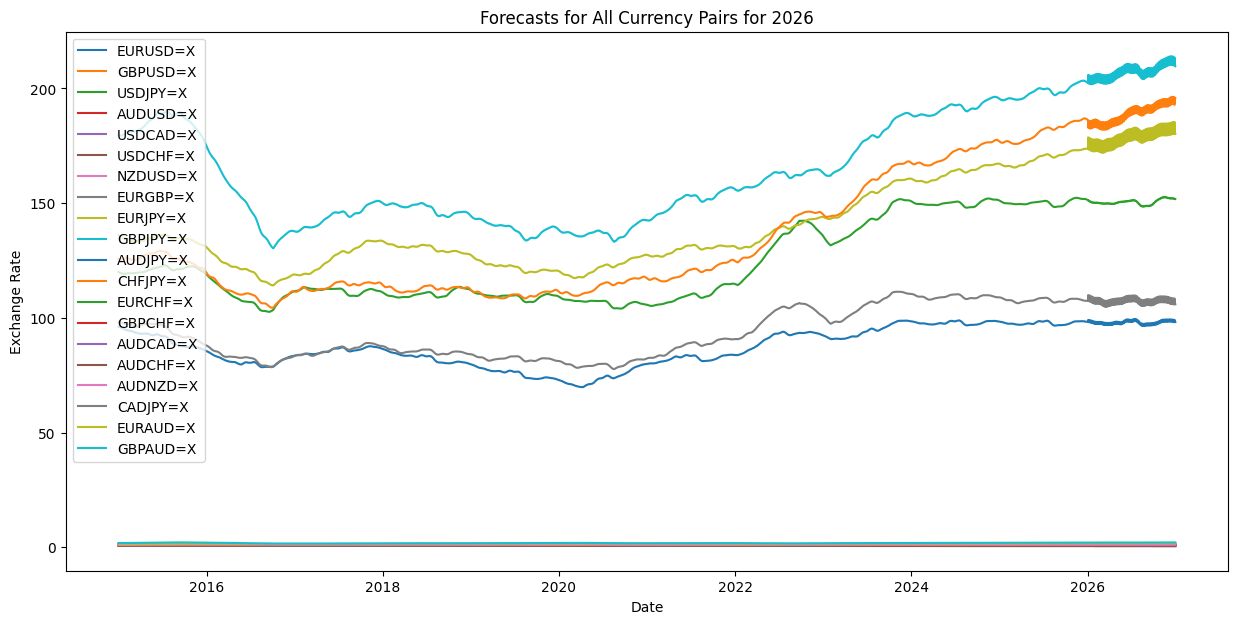

In [4]:
# Plot all forecasts together
agent.plot_all_forecasts()